[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/illarionovEA/010ef19d7efabed93724cffbb3912687)

# Matplotlib

In [1]:
import matplotlib.pyplot as plt

### Basic charts

![](https://qph.fs.quoracdn.net/main-qimg-e649ba1703fef26b52964b58c7f7f2b3)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

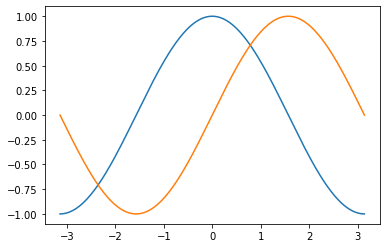

In [2]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)
plt.show()

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.

2. Plot the populations for the years in the period. Add legend and axis labels to the plot.
1. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.
1. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.
3. Find which year each species had the largest population. Mark these years in the plot of populations.
4. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.
5. Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.
6. Find the top 2 years for each species when they had the lowest populations.
7. Plot the change in hare population and the number of lynxes. Find the correlation coeffitient.
8. Show population of hares vs carrots and hares vs lynxes.
8. Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

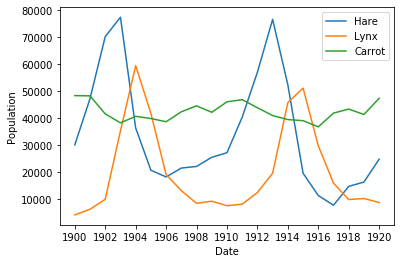

In [3]:
data = np.loadtxt('populations.txt')
plt.plot(data[:, 0], data[:, 1], label="Hare")
plt.plot(data[:, 0], data[:, 2], label="Lynx")
plt.plot(data[:, 0], data[:, 3], label="Carrot")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Population')
plt.xticks(data[::2, 0])
plt.show()

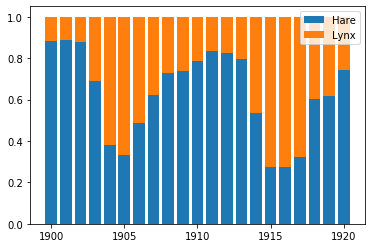

In [4]:
total = data[:, 1] + data[:, 2]
plt.bar(data[:, 0], data[:, 1] / total, label='Hare')
plt.bar(data[:, 0], data[:, 2] / total, bottom=data[:, 1] / total, label='Lynx')
plt.legend()
plt.show()

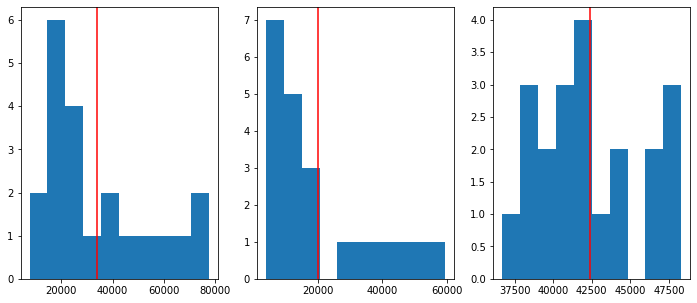

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
for i in range(3):
  ax[i].hist(data[:, i + 1])
  ax[i].axvline(data[:, i + 1].mean(), c='r')
plt.show()

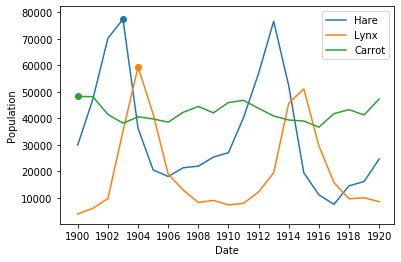

In [6]:
plt.plot(data[:, 0], data[:, 1], label="Hare")
plt.plot(data[:, 0], data[:, 2], label="Lynx")
plt.plot(data[:, 0], data[:, 3], label="Carrot")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Population')
plt.xticks(data[::2, 0])

hare_max = np.argmax(data[:, 1])
lynx_max = np.argmax(data[:, 2])
carrot_max = np.argmax(data[:, 3])
plt.scatter([data[hare_max, 0]], [data[hare_max, 1]])
plt.scatter([data[lynx_max, 0]], [data[lynx_max, 2]])
plt.scatter([data[carrot_max, 0]], [data[carrot_max, 3]])

plt.show()

In [7]:
kek = np.where(data[:, 1] > data[:, 2] , "H" , "L")
print(kek)

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


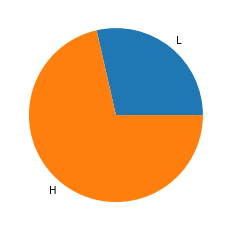

In [8]:
np.array(['H', 'L'])[data[:, 1:3].argmax(axis=1)]
arr = data[:, 1:3].argmax(axis=1)
plt.pie([arr.sum(), (1 - arr).sum()], labels=['L', 'H'])
plt.show()

## Homework

We will use k-means clustering algorithm to classify images in the MNIST dataset of handwritten digits.

Get dataset first:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Look at some items in the dataset:

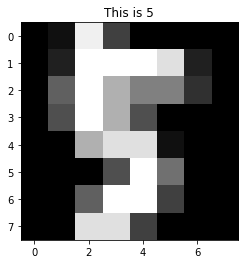

In [10]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

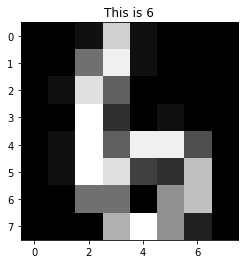

In [11]:
i = 728
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

Let's practice:

1. Divide the dataset into $k$ (let $k$=10 at first) clusters using k-means method that you implemented in previous homework. Assign digit to each clusters according to prevalent digit in the cluster. Show centroids (using ```imshow```) and assigned labels.
2. Write a function that calculates error rate (i.e. number of incorrect classified items relative to total number of items),
compute error rate for obtained clusters.
3. Calculate and visualize a confusion matrix ($a_{ij}$), where $i$ is predicted digit, $j$ is true digit, $a_{ij}$ is the number of items with predicted digit $i$ and true digit $j$. Make conclusions (which digits are confused at most, which are predicted with better accuracy).
3. Plot a graphic of error rate against number of clusters $k$, vary $k$ in some range. Select optimal value of $k$, explain your choice.
4. Show centroids and prevalent digits for optimal $k$. For which digits there is more than one cluster? For which digits there is exactly one cluster? Visualize a new confusion matrix. Make conclusions.
5. (extra) Suggest improvements for better classification accuracy.

## Problem 1

In [12]:
from scipy.cluster.vq import kmeans
from operator import itemgetter


def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)


def predict_digits(k):
    centroids, score = kmeans(flattened_images, k)
    labels = get_labels(flattened_images, centroids)
    
    cluster_to_digit = []
    for i in range(k):
        cluster_to_digit.append(np.argmax(np.bincount(digits.target[labels == i])))
    
    y_pred = np.array(list(map(cluster_to_digit.__getitem__, labels)))
    return y_pred, centroids, cluster_to_digit

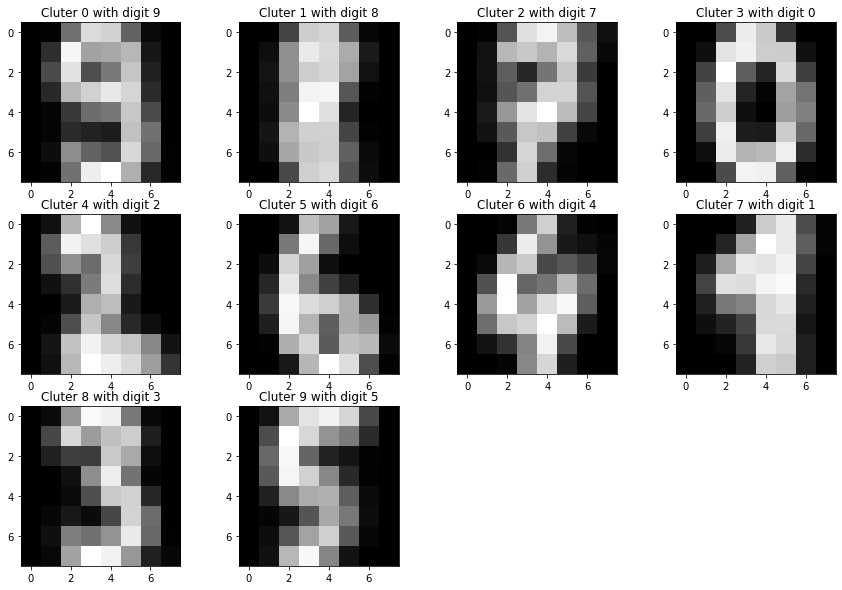

In [13]:
from sklearn.preprocessing import scale
from scipy.cluster.vq import kmeans

flattened_images = digits.images.reshape((digits.images.shape[0], -1))
y_pred, centroids, cluster_to_digit = predict_digits(10)

plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.title('Cluter {} with digit {}'.format(i, cluster_to_digit[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')

## Problem 2

In [14]:
def error(y_true, y_pred):
    return np.count_nonzero(y_true != y_pred) / y_true.size

In [15]:
print('Total error', error(digits.target, y_pred))

for i in range(10):
    digit_i_mask = (digits.target == i)
    print('Digit', i, 'error', error(digits.target[digit_i_mask], y_pred[digit_i_mask]))

Total error 0.20645520311630494
Digit 0 error 0.0056179775280898875
Digit 1 error 0.6978021978021978
Digit 2 error 0.1638418079096045
Digit 3 error 0.15300546448087432
Digit 4 error 0.09392265193370165
Digit 5 error 0.25274725274725274
Digit 6 error 0.022099447513812154
Digit 7 error 0.0223463687150838
Digit 8 error 0.42528735632183906
Digit 9 error 0.22777777777777777


## Problem 3

In [16]:
def draw_conf_matr(y_true, y_pred):
    num_types = max(y_true.max(), y_pred.max()) + 1
    conf_matr =  np.array([[np.count_nonzero((y_true == i) & (y_pred == j)) for j in range(num_types)] \
                            for i in range(num_types)])
    plt.matshow(conf_matr)
    plt.xticks(range(num_types))
    plt.yticks(range(num_types))
    plt.title('Confusion matrix ')
    plt.ylabel('Настоящее значение')
    plt.xlabel('Предсказанное значение')
    plt.show()

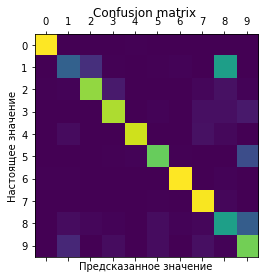

In [17]:
draw_conf_matr(digits.target, y_pred)

Видно, что модель плохо классифицирует цифры 1, 5, 9. Лучше всего классифицируются 0, 4, 6, 7.

## Задача 4

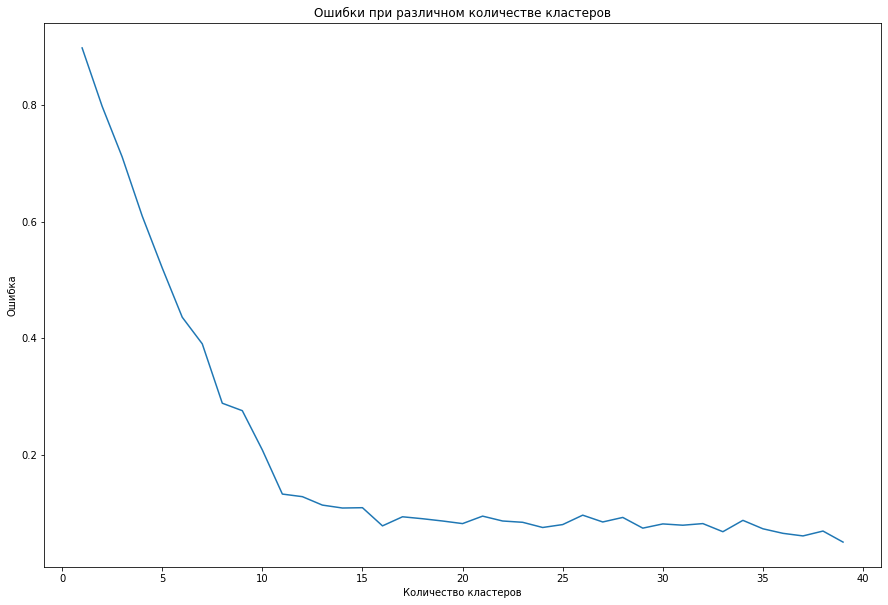

In [18]:
k_range = range(1, 40)
errors = [error(digits.target, predict_digits(k)[0]) for k in k_range]

plt.figure(figsize=(15,10))
plt.title('Ошибки при различном количестве кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка')
plt.plot(k_range, errors)

Оптимальным будет $ k = 16 $. Из графика видно, что после $ k = 16 $ ошибка меняется незначительно. При больших $ k $ может произойти переобучение (вообще можно получить ошибку 0, когда в каждом кластере по одному элементу), поэтому разумно выбрать небольшое $ k $.

## Задача 5

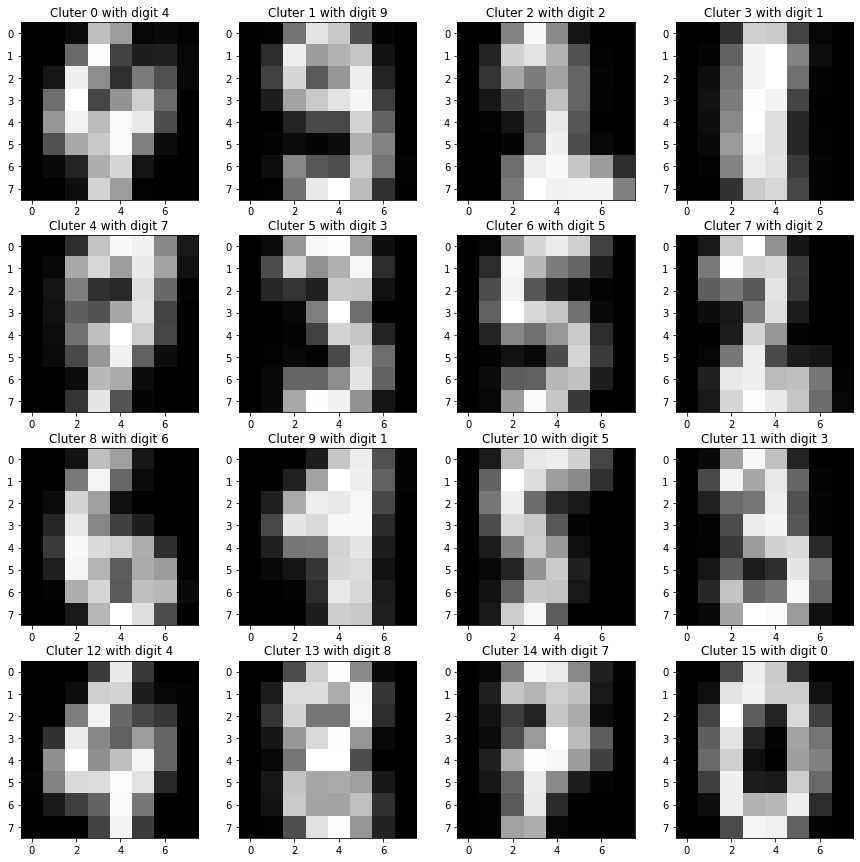

In [19]:
y_pred, centroids, cluster_to_digit = predict_digits(16)

plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.title('Cluter {} with digit {}'.format(i, cluster_to_digit[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')

Цифрам 0, 3, 4, 8, 9 соответствует один кластер, цифрам 2, 5, 6, 7 - два, цифре 1 - три. 

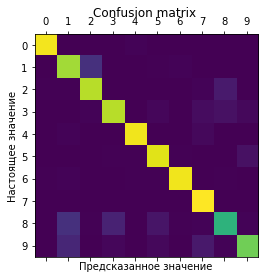

In [20]:
draw_conf_matr(digits.target, y_pred)

При увеличении количества кластеров точность модели увеличилась. Мы получили более мелкое разбиение пространства признаков. Модель выделила подтипы одной цифры, которые она уже может отличить от других.

## Задача 6

Главная проблема нашего подхода заключается в том, что если сдвинуть цифру на несколько пикселей по картинке, то расстояние до центра кластера может сильно измениться. Евклидова метрика не очень хорошо подходит для измерения похожести картинок. Для классификации картинок лучше пользоваться алгоритмами, для которых место расположения объкта на картинке не имеет значения, например сверточными нейронными сетями.